# Run julia placement server

In [1]:
1+2

3

In [2]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

 Activating environment at `~/bhdl/placement/Project.toml`


In [3]:
include("server.jl")

test (generic function with 1 method)

In [ ]:
web_server()

┌ Info: Listening on localhost:8082 ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:14


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 36766

{"ys":[497.448295940549,394.4995967974138,120.96813463673732,497.448295940549,336.4170793027116,394.4995967974138,392.20676749316465,394.4995967974138,394.4995967974138,394.4995967974138,394.4995967974138,394.4995967974138,394.4995967974138,330.7217489260738,341.79286199880505,267.9361985891609,555.3970147131336,326.56013747664986,433.36221383381405,687.796271735642,556.3243408372794,283.8441432262206,223.91967256890962,394.4995967974138,387.1099197888784,394.4995967974138,543.0253698705801,371.8771952667231,381.734137092785,394.4995967974138,437.5238252832379,394.4995967974138,394.4995967974138,394.4995967974138,67.13326218869588,67.13326218869588,448.59493835596925,280.3078434317142,341.79286199880517,265.0751189095589,234.99078564164097,394.4995967974138,558.9333145076399,452.1312381504757,394.4995967974138,161.13412223199668,283.8441432262206,329

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
Running for 50 steps ..100%|████████████████████████████| Time: 0:00:23
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 36806

{"ys":[478.6792716238873,158.27304255239483,481.5403513034893,448.59493835596936,371.8771952667231,588.3424276606534,67.13326218869588,733.1133295257152,558.9333145076399,445.69718864163076,687.796271735642,556.3243408372795,122.81292658838333,67.13326218869588,222.61914079908752,67.13326218869588,394.4995967974138,394.4995967974138,394.4995967974138,394.4995967974138,381.734137092785,374.73827494632496,265.0751189095589,394.4995967974138,544.3259016404022,329.4212171562517,488.5362134499492,173.50576707455002,326.56013747664986,651.1279779975663,394.4995967974138,601.6413986273527,345.3291617933114,460.42159329295043,558.9333145076399,601.6413986273528,115.81706444192321,120.96813463673732,394.4995967974138,394.4995967974138,394.4995967974138,394.4995967974138,394.4995967974138,17.67765013029009,437.5238252832379,605.810920207493,497.448295940549,26

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
Running for 50 steps ..100%|████████████████████████████| Time: 0:00:01
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 32547

{"ys":[478.67926,158.27304,481.54034,448.59494,371.8772,588.3424,67.13326,733.11334,558.9333,445.69717,687.79626,556.32434,122.81293,67.13326,222.61914,67.13326,359.35803,359.35803,205.38768,145.83682,381.73413,374.73828,265.0751,95.52881,544.3259,329.4212,488.53622,173.50577,326.56015,651.128,136.52847,601.6414,345.32916,460.4216,558.9333,601.6414,115.81706,120.96813,357.99692,359.35803,181.91147,359.35803,199.81161,17.67765,437.52383,605.8109,497.4483,267.9362,581.1122,595.83655,374.73828,493.912,128.1887,283.84415,651.128,330.72174,733.11334,345.32916,225.18733,238.52708,460.4216,329.4212,436.2233,359.35803,125.4883,359.35803,174.16942,433.3622,371.8772,161.21991,223.91968,267.9362,436.2233,478.67926,341.79288,493.912,600.71405,165.71436,588.3424,285.4047,585.4813,452.13123,47.29071,168.12999,445.69717,543.0254,481.54034,213.17271,133.57343,342.21

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
┌ Info: cycle 2, remaining conflicts: 8
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 10%|██▊                        |  ETA: 0:02:40┌ Info: cycle 3, remaining conflicts: 4
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 20%|█████▍                     |  ETA: 0:01:54┌ Info: cycle 4, remaining conflicts: 0
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles ..100%|███████████████████████████| Time: 0:00:38
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 36823

{"ys":[341.79286199880505,436.2232935134159,394.4995967974138,497.448295940549,394.4995967974138,67.13326218869588,128.18870928447666,540.1642901909781,168.12998437845658,394.4995967974138,283.8441432262206,67.13326218869588,555.3970147131336,394.4995967974138,345.3291617933114,394.4995967974138,336.41707930271167,17.67765013029009,158.27304255239483,544.3259016404022,394.4995967974138,493.9119961460426,178.60261477883614,394.4995967974138,394.4995967974138,481.5403513034893,67.13326218869588,371.8771952667231,394.4995967974138,394.4995967974138,173.50576707455002,219.75806111948566,223.91967256890962,394.4995967974138,445.69718864163076,394.4995967974138,122.81292658838333,394.4995967974138,222.61914079908752,394.4995967974138,381.734137092785,604.2503722977132,112.95598476232146,488.5362134499492,265.0751189095589,595.8365691133027,499.008843850328

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
Running for 50 steps ..100%|████████████████████████████| Time: 0:00:01
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 32554

{"ys":[341.79288,436.2233,126.57729,497.4483,233.01978,67.13326,128.1887,540.1643,168.12999,112.358345,283.84415,67.13326,555.39703,17.299484,345.32916,180.24802,336.41708,17.67765,158.27304,544.3259,136.83972,493.912,178.60262,89.4463,191.6942,481.54034,67.13326,371.8772,231.33759,231.33759,173.50577,219.75806,223.91968,124.63334,445.69717,118.42247,122.81293,357.75095,222.61914,150.91083,381.73413,604.25037,112.955986,488.53622,265.0751,595.83655,499.00885,105.148834,184.82365,47.29071,109.760864,229.615,231.33759,67.13326,433.3622,112.955986,341.79288,112.358345,558.9333,213.55359,443.21915,213.55359,73.5467,67.13326,371.8772,544.3259,229.615,478.67926,267.9362,448.59494,285.4047,265.0751,374.73828,146.09985,109.760864,274.93207,31.677906,208.04947,326.56015,687.79626,238.52708,121.4576,158.27304,357.75095,173.50577,198.58496,460.4216,96.310165,32

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
┌ Info: cycle 2, remaining conflicts: 6
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 10%|██▊                        |  ETA: 0:02:22┌ Info: cycle 3, remaining conflicts: 2
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 20%|█████▍                     |  ETA: 0:01:44┌ Info: cycle 4, remaining conflicts: 0
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles ..100%|███████████████████████████| Time: 0:00:35
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 36824

{"ys":[341.79286199880505,436.2232935134159,394.4995967974138,497.448295940549,394.4995967974138,67.13326218869588,128.18870928447666,540.1642901909781,168.12998437845658,394.4995967974138,283.8441432262206,67.13326218869588,555.3970147131336,394.4995967974138,345.3291617933114,394.4995967974138,336.41707930271167,17.67765013029009,158.27304255239483,544.3259016404022,394.4995967974138,493.9119961460426,178.60261477883614,394.4995967974138,394.4995967974138,481.5403513034893,67.13326218869588,371.8771952667231,394.4995967974138,394.4995967974138,173.50576707455002,219.75806111948566,223.91967256890962,394.4995967974138,445.69718864163076,394.4995967974138,122.81292658838333,394.4995967974138,222.61914079908752,394.4995967974138,381.734137092785,604.2503722977132,112.95598476232146,488.5362134499492,265.0751189095589,595.8365691133027,499.008843850328

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
Running for 50 steps ..100%|████████████████████████████| Time: 0:00:01
┌ Info: cycle 2, remaining conflicts: 2
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 10%|██▊                        |  ETA: 0:01:32┌ Info: cycle 3, remaining conflicts: 0
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles ..100%|███████████████████████████| Time: 0:00:19
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 36823

{"ys":[341.79286199880505,436.2232935134159,394.4995967974138,497.448295940549,394.4995967974138,67.13326218869588,128.18870928447666,540.1642901909781,168.12998437845658,394.4995967974138,283.8441432262206,67.13326218869588,555.3970147131336,394.4995967974138,345.3291617933114,394.4995967974138,336.41707930271167,17.67765013029009,158.27304255239483,544.3259016404022,394.4995967974138,493.9119961460426,178.60261477883614,394.4995967974138,394.4995967974138,481.5403513034893,67.13326218869588,371.8771952667231,394.4995967974138,394.4995967974138,173.50576707455002,219.75806111948566,223.91967256890962,394.4995967974138,445.69718864163076,394.4995967974138,122.81292658838333,394.4995967974138,222.61914079908752,394.4995967974138,381.734137092785,604.2503722977132,112.95598476232146,488.5362134499492,265.0751189095589,595.8365691133027,499.008843850328

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
Running for 50 steps ..100%|████████████████████████████| Time: 0:00:01
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 32554

{"ys":[341.79288,436.2233,126.57729,497.4483,233.01978,67.13326,128.1887,540.1643,168.12999,112.358345,283.84415,67.13326,555.39703,17.299484,345.32916,180.24802,336.41708,17.67765,158.27304,544.3259,136.83972,493.912,178.60262,89.4463,191.6942,481.54034,67.13326,371.8772,231.33759,231.33759,173.50577,219.75806,223.91968,124.63334,445.69717,118.42247,122.81293,357.75095,222.61914,150.91083,381.73413,604.25037,112.955986,488.53622,265.0751,595.83655,499.00885,105.148834,184.82365,47.29071,109.760864,229.615,231.33759,67.13326,433.3622,112.955986,341.79288,112.358345,558.9333,213.55359,443.21915,213.55359,73.5467,67.13326,371.8772,544.3259,229.615,478.67926,267.9362,448.59494,285.4047,265.0751,374.73828,146.09985,109.760864,274.93207,31.677906,208.04947,326.56015,687.79626,238.52708,121.4576,158.27304,357.75095,173.50577,198.58496,460.4216,96.310165,32

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
┌ Info: cycle 2, remaining conflicts: 6
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 10%|██▊                        |  ETA: 0:02:25┌ Info: cycle 3, remaining conflicts: 2
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 20%|█████▍                     |  ETA: 0:01:46┌ Info: cycle 4, remaining conflicts: 0
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles ..100%|███████████████████████████| Time: 0:00:35
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 36824

{"ys":[341.79286199880505,436.2232935134159,394.4995967974138,497.448295940549,394.4995967974138,67.13326218869588,128.18870928447666,540.1642901909781,168.12998437845658,394.4995967974138,283.8441432262206,67.13326218869588,555.3970147131336,394.4995967974138,345.3291617933114,394.4995967974138,336.41707930271167,17.67765013029009,158.27304255239483,544.3259016404022,394.4995967974138,493.9119961460426,178.60261477883614,394.4995967974138,394.4995967974138,481.5403513034893,67.13326218869588,371.8771952667231,394.4995967974138,394.4995967974138,173.50576707455002,219.75806111948566,223.91967256890962,394.4995967974138,445.69718864163076,394.4995967974138,122.81292658838333,394.4995967974138,222.61914079908752,394.4995967974138,381.734137092785,604.2503722977132,112.95598476232146,488.5362134499492,265.0751189095589,595.8365691133027,499.008843850328

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
Running for 50 steps ..100%|████████████████████████████| Time: 0:00:01
┌ Info: cycle 2, remaining conflicts: 2
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 10%|██▊                        |  ETA: 0:01:35┌ Info: cycle 3, remaining conflicts: 0
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles ..100%|███████████████████████████| Time: 0:00:19
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


request = HTTP.Messages.Request:
"""
POST / HTTP/1.1
Host: localhost:8082
User-Agent: Racket/7.7 (net/http-client)
Content-Length: 36824

{"ys":[341.79286199880505,436.2232935134159,394.4995967974138,497.448295940549,394.4995967974138,67.13326218869588,128.18870928447666,540.1642901909781,168.12998437845658,394.4995967974138,283.8441432262206,67.13326218869588,555.3970147131336,394.4995967974138,345.3291617933114,394.4995967974138,336.41707930271167,17.67765013029009,158.27304255239483,544.3259016404022,394.4995967974138,493.9119961460426,178.60261477883614,394.4995967974138,394.4995967974138,481.5403513034893,67.13326218869588,371.8771952667231,394.4995967974138,394.4995967974138,173.50576707455002,219.75806111948566,223.91967256890962,394.4995967974138,445.69718864163076,394.4995967974138,122.81292658838333,394.4995967974138,222.61914079908752,394.4995967974138,381.734137092785,604.2503722977132,112.95598476232146,488.5362134499492,265.0751189095589,595.8365691133027,499.008843850328

┌ Info: parsing payload ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:24
┌ Info: running placement ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:28
Running for 50 steps ..100%|████████████████████████████| Time: 0:00:01
┌ Info: cycle 2, remaining conflicts: 2
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles .. 10%|██▊                        |  ETA: 0:01:38┌ Info: cycle 3, remaining conflicts: 0
└ @ Main /home/jupyter-lihebi/bhdl/placement/place.jl:552
Running for 10 cycles ..100%|███████████████████████████| Time: 0:00:20
┌ Info: sending results back ..
└ @ Main /home/jupyter-lihebi/bhdl/placement/server.jl:52


# Testing a local place spec:

In [4]:
str = open("place-spec.json") do io
    read(io, String)
end
jobj = JSON.parse(str)
xs, ys, as, ws, hs, Es, mask, diearea, params = decode_place_spec(jobj)

(Any[1699.405714562617, 1386.3552595774156, 828.5036524340493, 1248.8557941607005, 742.9006675632547, 828.5036524340493, 1075.0718471354876, 828.5036524340493, 46.40476096858343, 269.34311787934405  …  1401.0796642287353, 700.4148325794499, 828.5036524340493, 828.5036524340493, 130.78885499764618, 1352.962088781741, 1127.9402267792848, 604.7043839316864, 828.5036524340493, 567.2110530812913], Any[821.7240651821372, 732.9390555841774, 394.4995967974138, 827.3694870987881, 67.13326218869588, 394.4995967974138, 802.4475265483484, 394.4995967974138, 551.2165280654376, -77.64739934065722  …  687.621997794104, 120.96813463673732, 394.4995967974138, 394.4995967974138, 153.42524592051075, 506.9632580272955, 362.8670748678257, 117.84618484593557, 394.4995967974138, 279.32188774748647], Any[-0.3141592653589793, -0.3141592653589793, 0, -0.3141592653589793, 0, 0, -0.3141592653589793, 0, 0.3141592653589793, 0.3141592653589793  …  -0.3141592653589793, 0, 0, 0, 0.3141592653589793, -0.3141592653589793

In [44]:
R = Region(xs, ys, ws, hs, diearea, 300)

Region(300, 5.523357692893661, 2.6299973219827586, 0, 1657.0073048680986, 0, 788.9991935948276, Float32[0.0 5.523358 … 1645.9606 1651.484; 0.0 5.523358 … 1645.9606 1651.484; … ; 0.0 5.523358 … 1645.9606 1651.484; 0.0 5.523358 … 1645.9606 1651.484], Float32[0.0 0.0 … 0.0 0.0; 2.6299973 2.6299973 … 2.6299973 2.6299973; … ; 783.7392 783.7392 … 783.7392 783.7392; 786.3692 786.3692 … 786.3692 786.3692], Float32[5.523358 11.046716 … 1651.484 1657.0073; 5.523358 11.046716 … 1651.484 1657.0073; … ; 5.523358 11.046716 … 1651.484 1657.0073; 5.523358 11.046716 … 1651.484 1657.0073], Float32[2.6299973 2.6299973 … 2.6299973 2.6299973; 5.2599945 5.2599945 … 5.2599945 5.2599945; … ; 786.3692 786.3692 … 786.3692 786.3692; 788.9992 788.9992 … 788.9992 788.9992], [0.020943951023931952 0.041887902047863905 … 6.262241356155655 6.283185307179586; 0.020943951023931952 0.041887902047863905 … 6.262241356155655 6.283185307179586; … ; 0.020943951023931952 0.041887902047863905 … 6.262241356155655 6.2831853071795

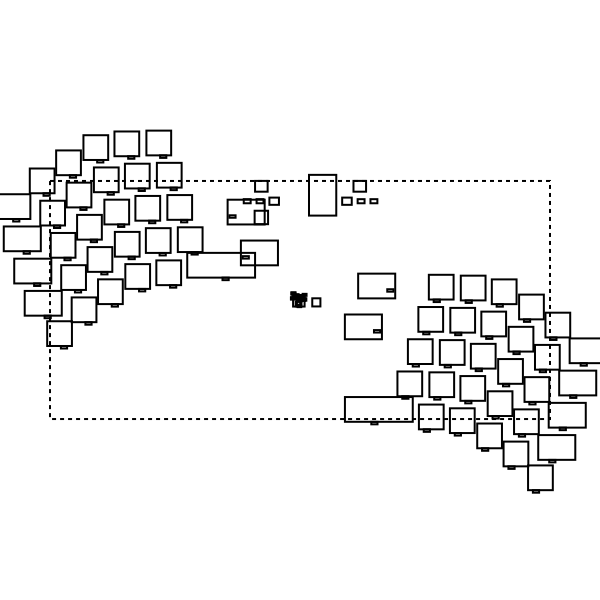

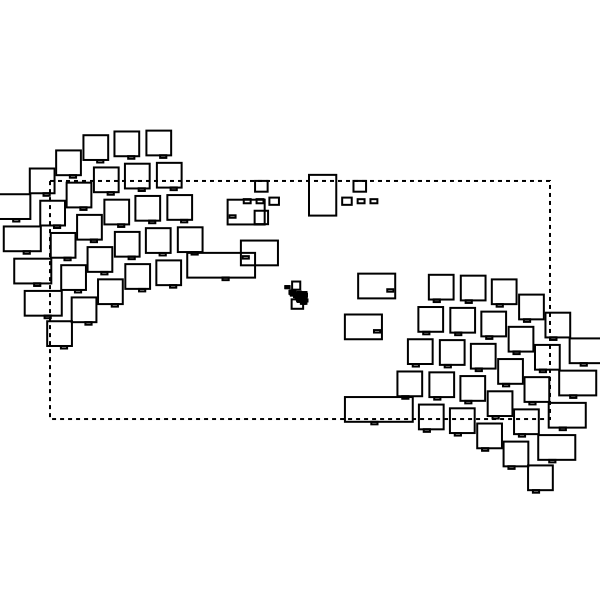

Running for 50 steps ..  4%|█▏                          |  ETA: 0:00:03

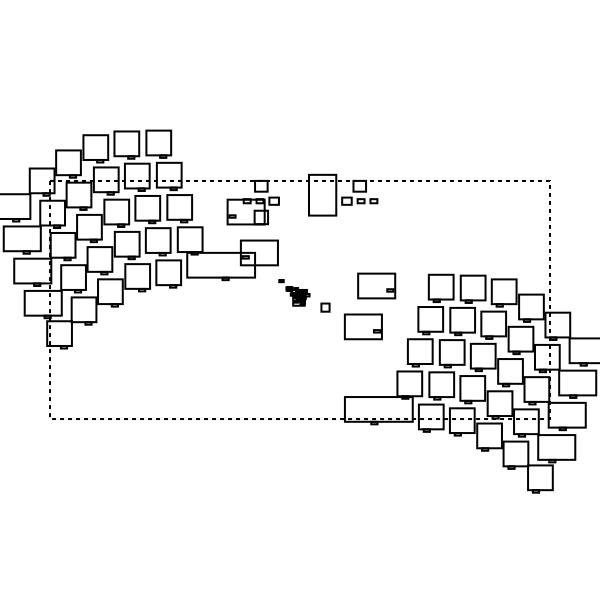

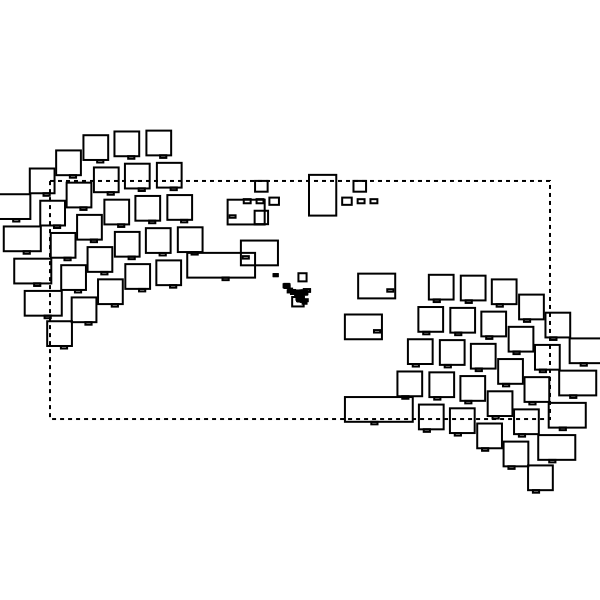

Running for 50 steps ..  8%|██▎                         |  ETA: 0:00:03

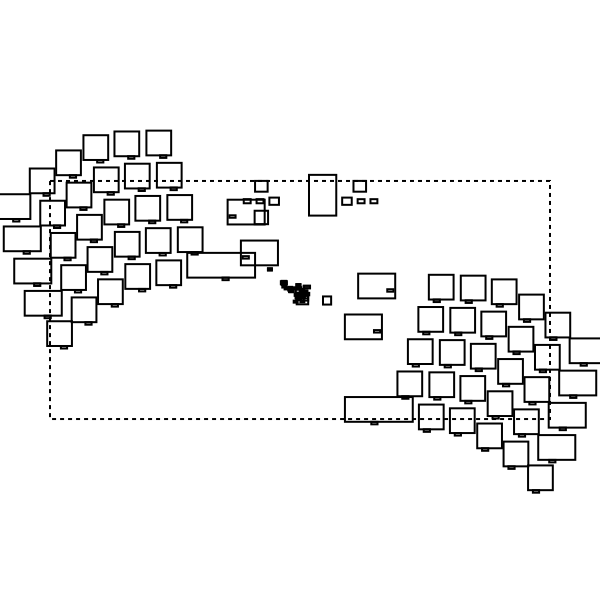

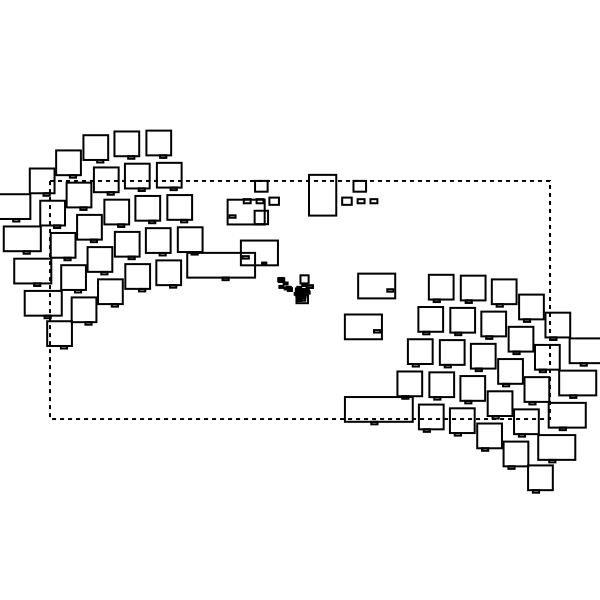

Running for 50 steps .. 12%|███▍                        |  ETA: 0:00:03

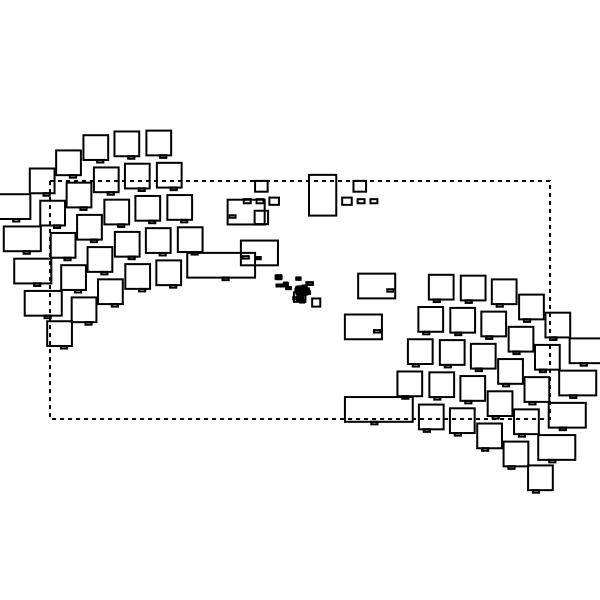

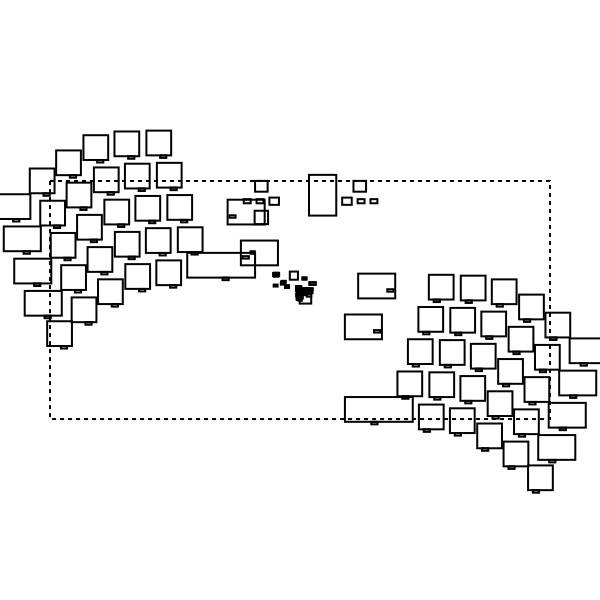

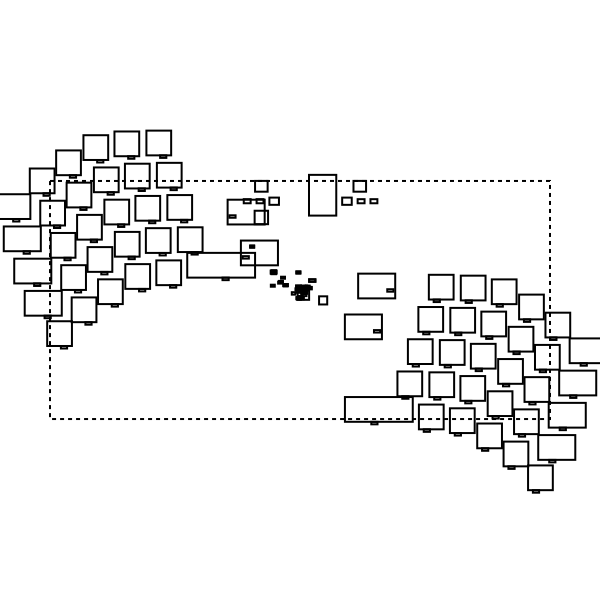

Running for 50 steps .. 18%|█████                       |  ETA: 0:00:02

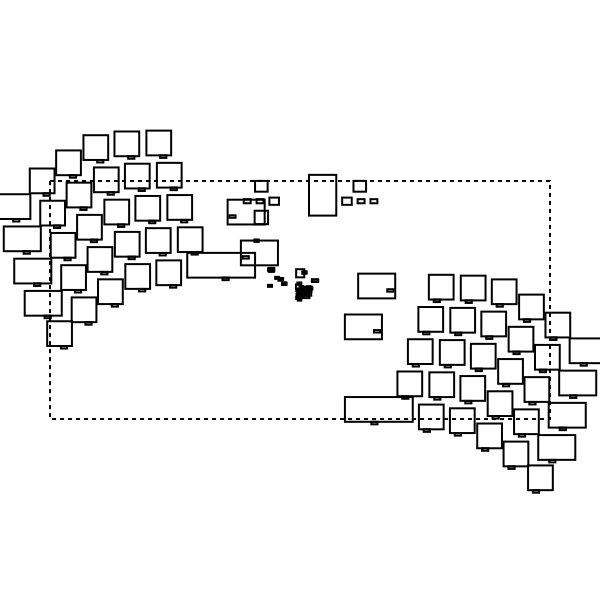

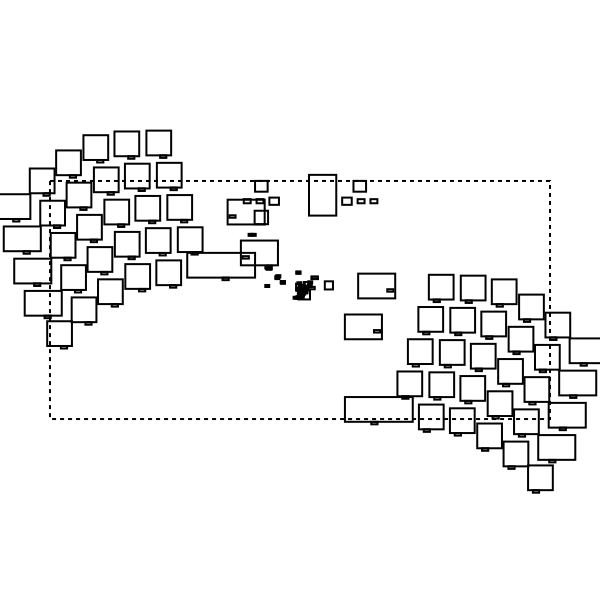

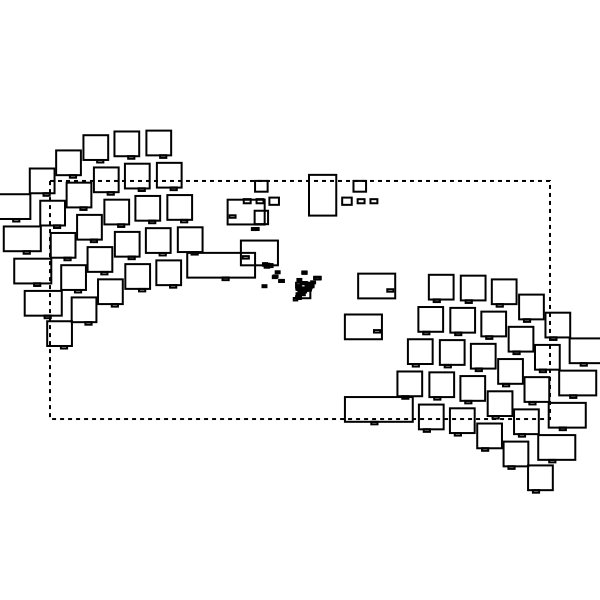

Running for 50 steps .. 24%|██████▊                     |  ETA: 0:00:02

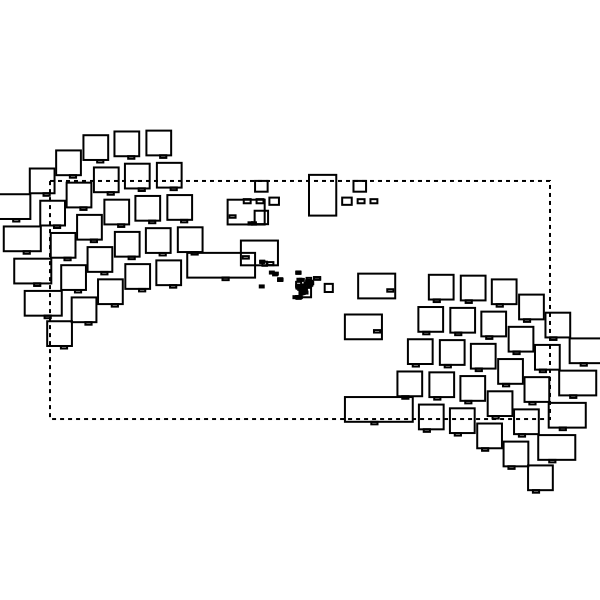

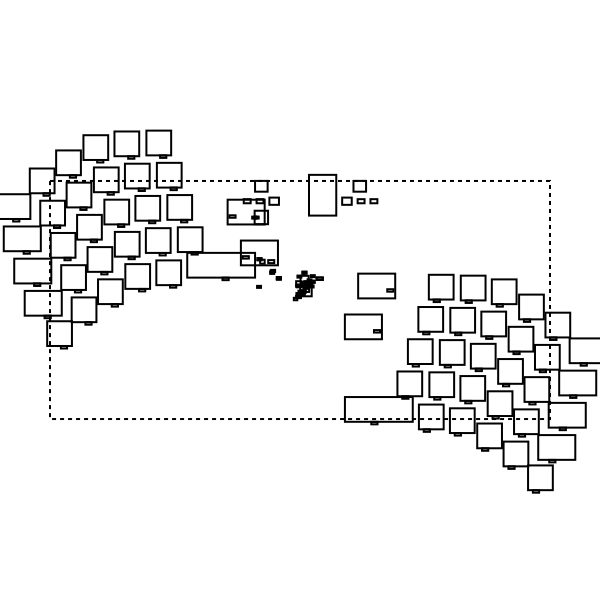

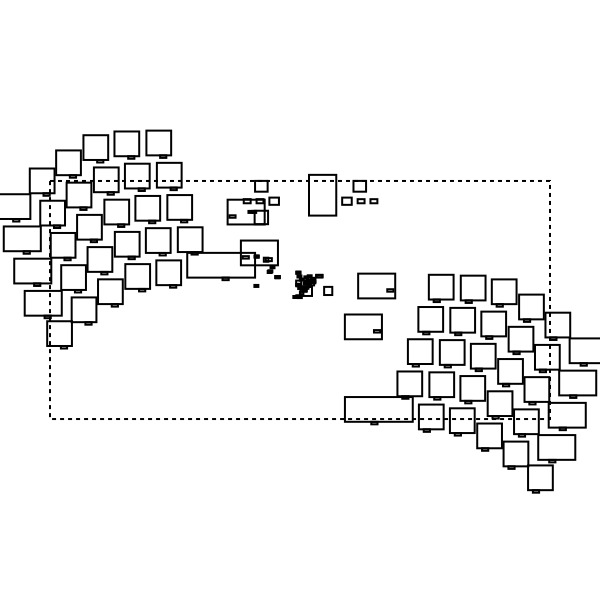

Running for 50 steps .. 30%|████████▍                   |  ETA: 0:00:02

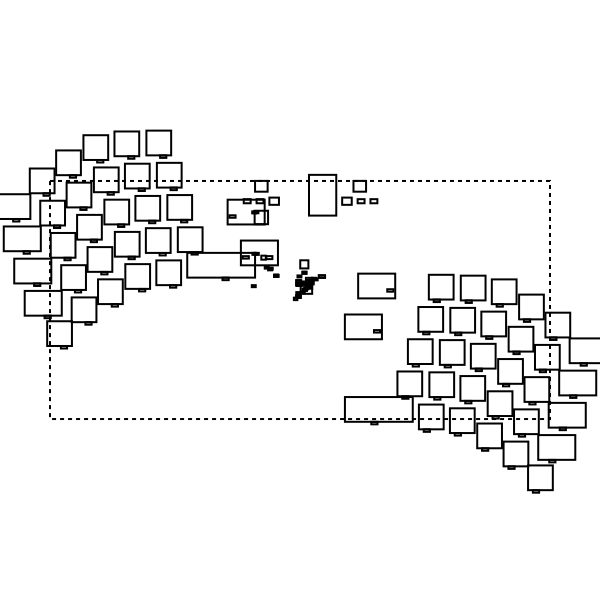

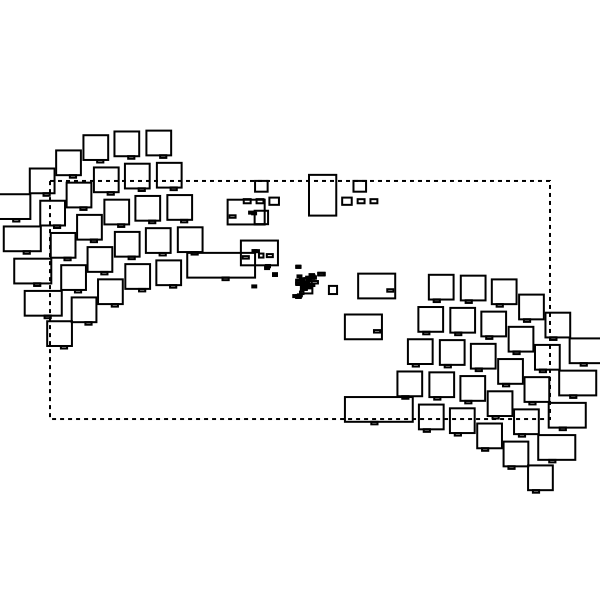

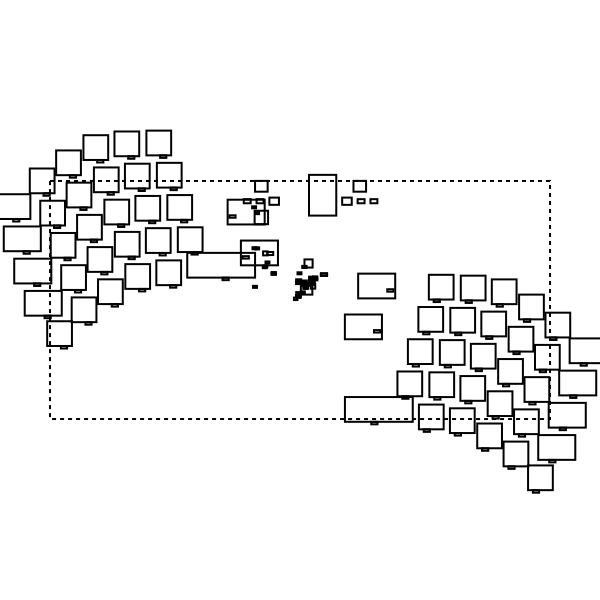

Running for 50 steps .. 36%|██████████▏                 |  ETA: 0:00:02

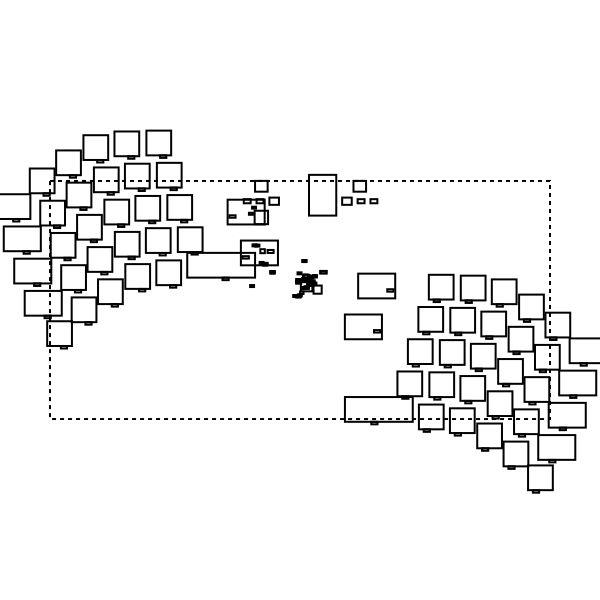

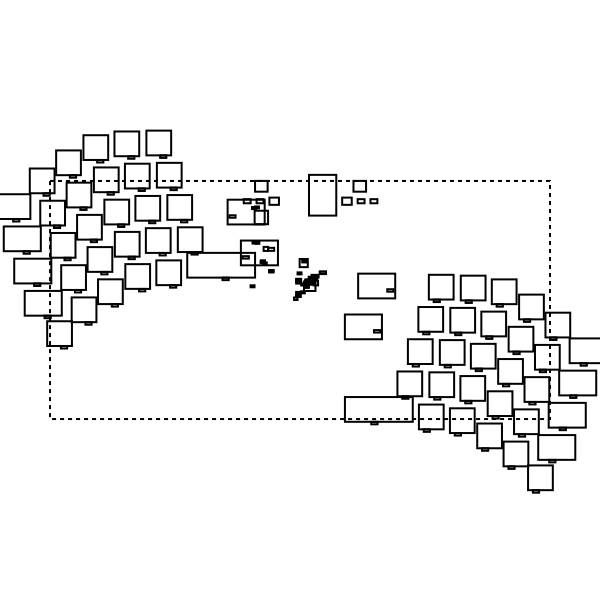

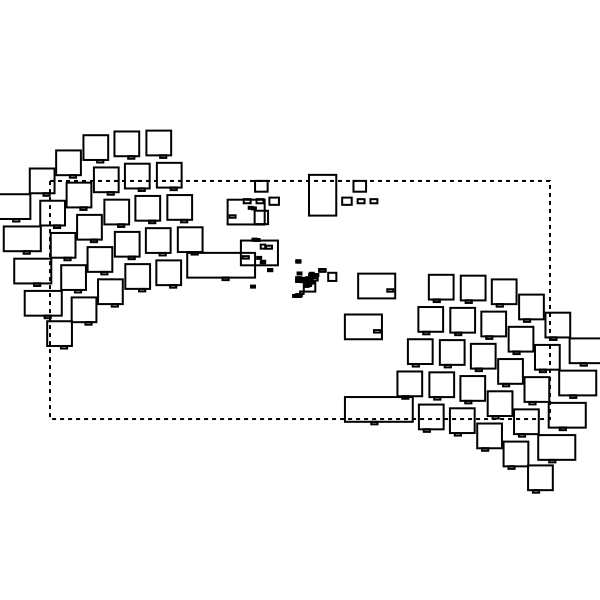

Running for 50 steps .. 42%|███████████▊                |  ETA: 0:00:01

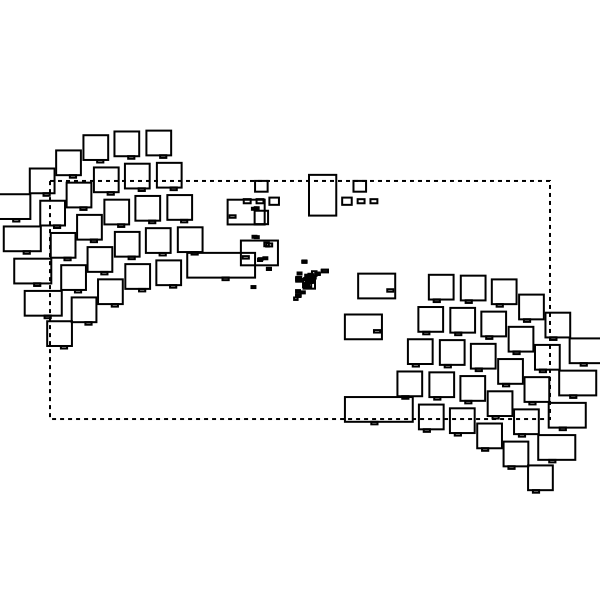

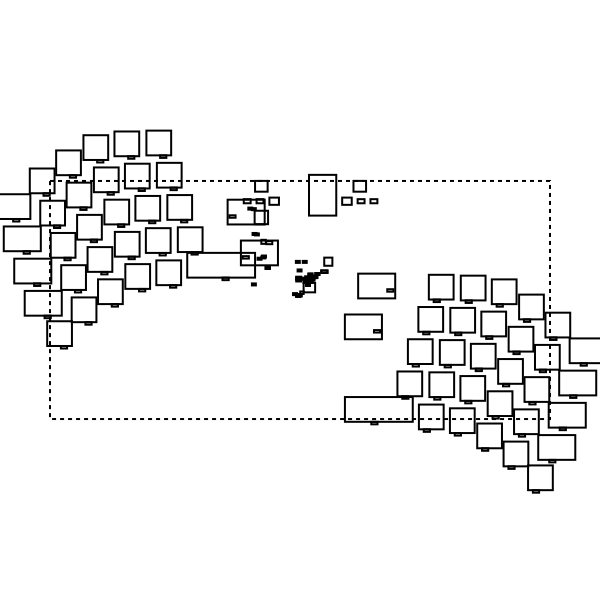

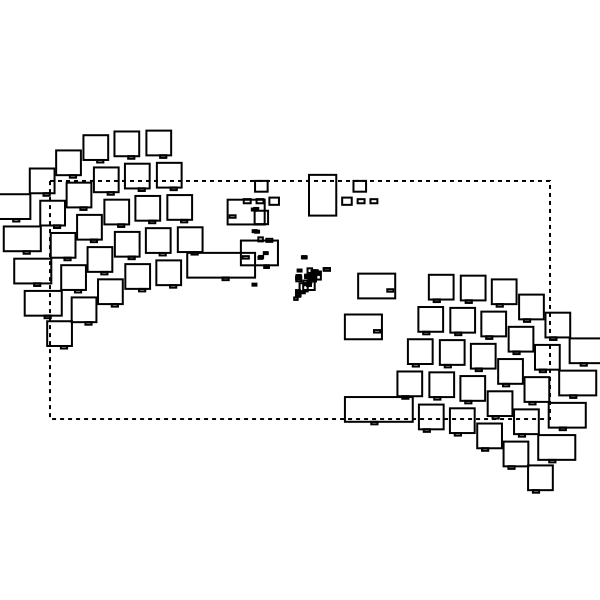

Running for 50 steps .. 48%|█████████████▌              |  ETA: 0:00:01

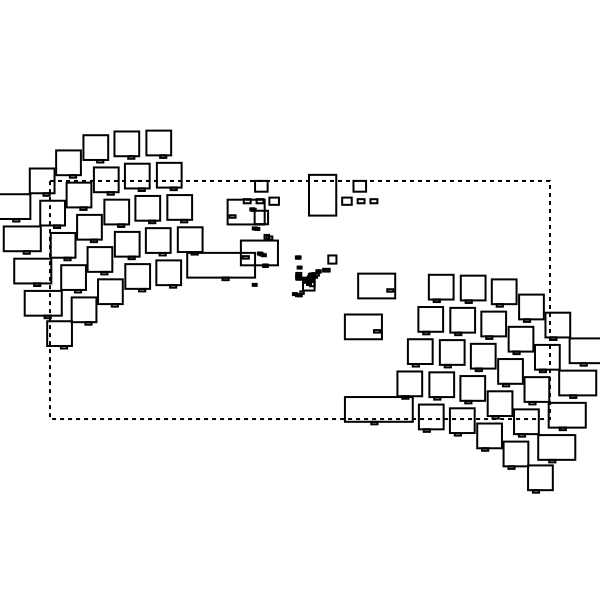

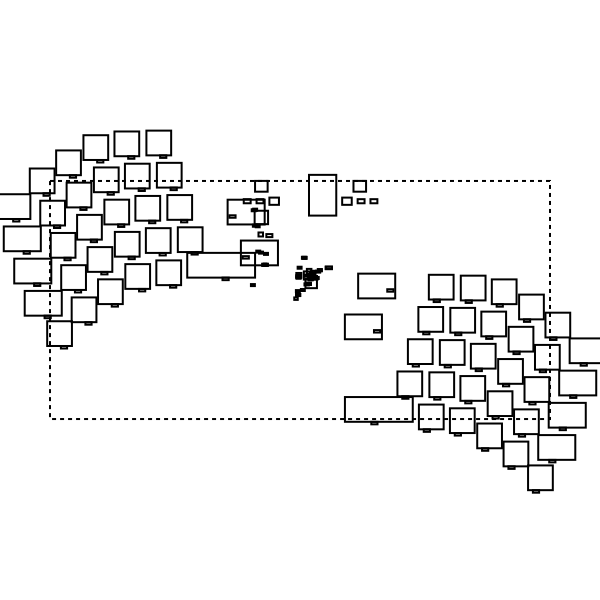

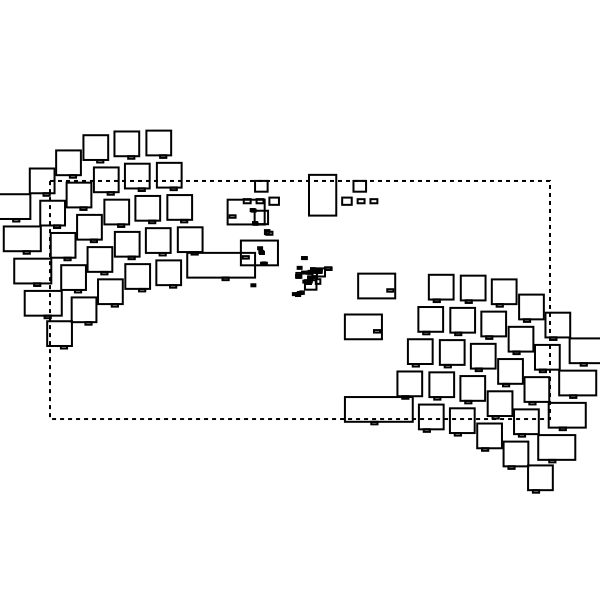

Running for 50 steps .. 54%|███████████████▏            |  ETA: 0:00:01

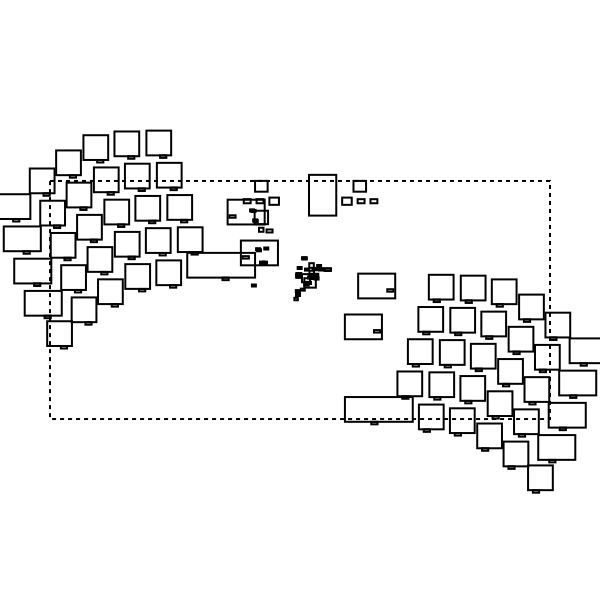

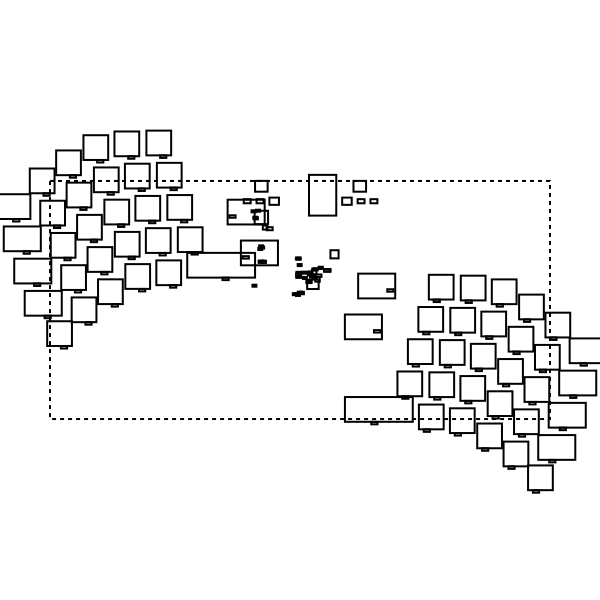

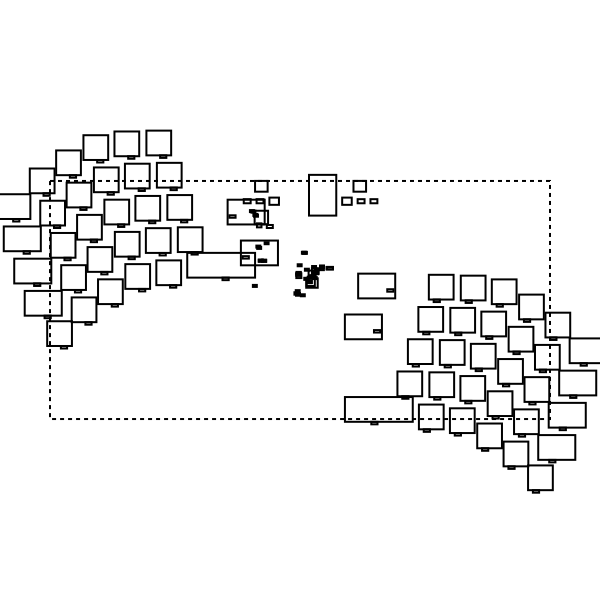

Running for 50 steps .. 60%|████████████████▊           |  ETA: 0:00:01

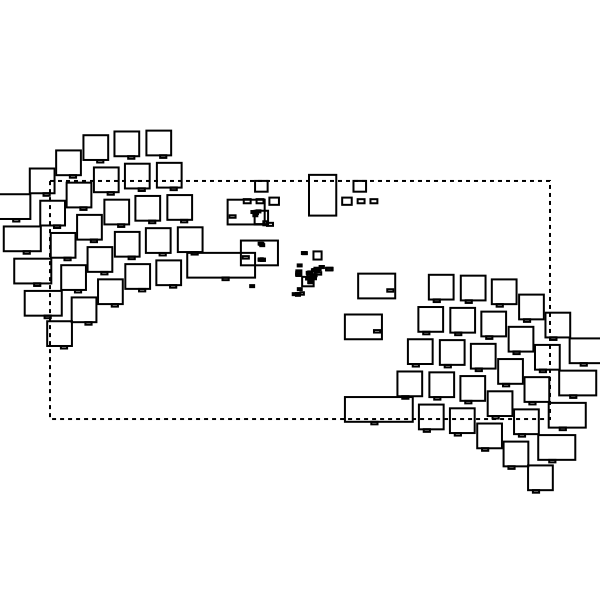

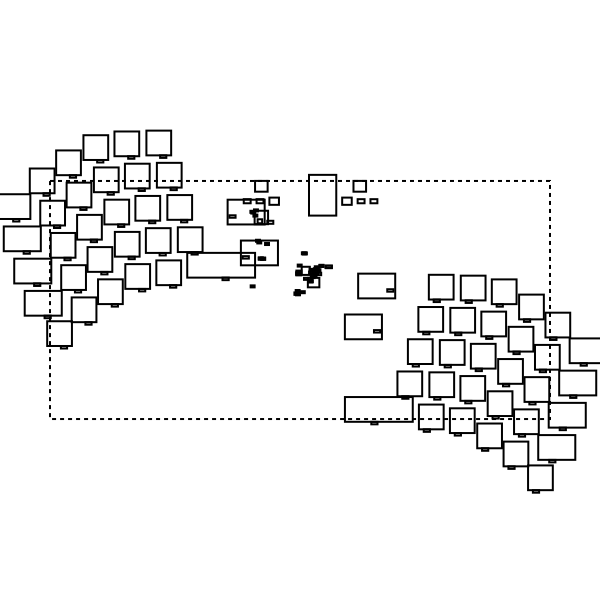

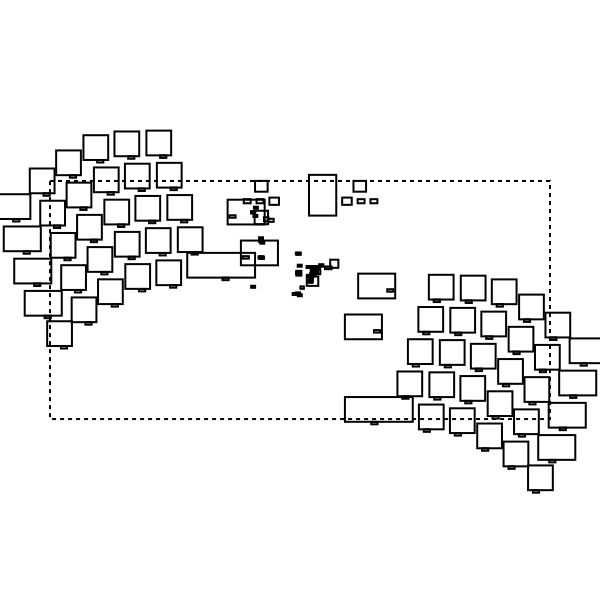

Running for 50 steps .. 66%|██████████████████▌         |  ETA: 0:00:01

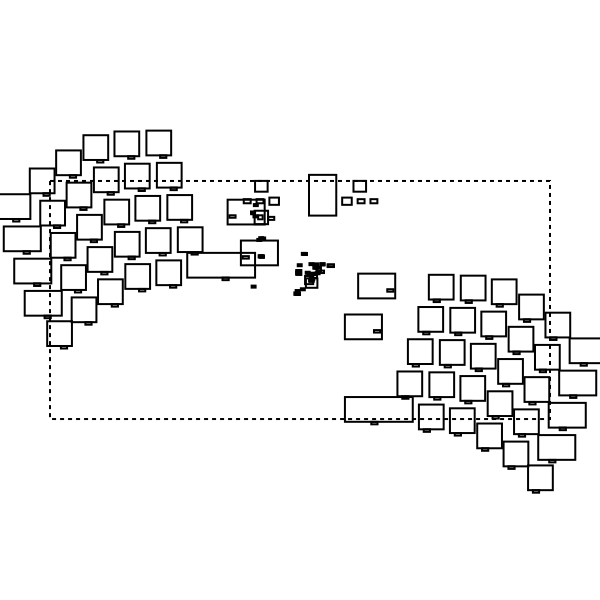

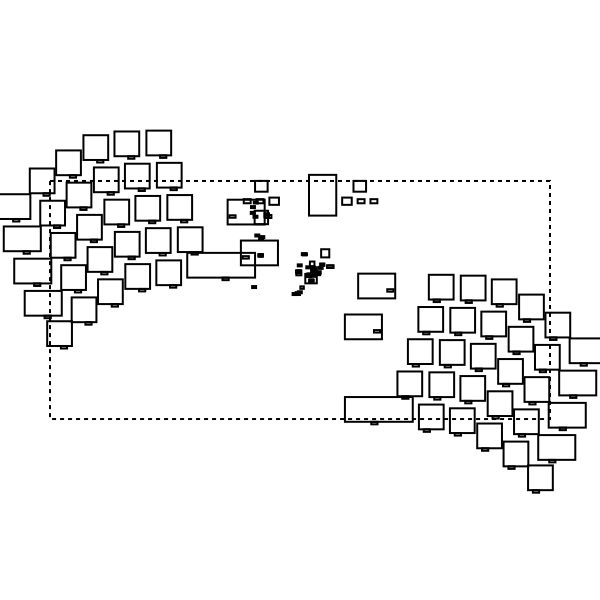

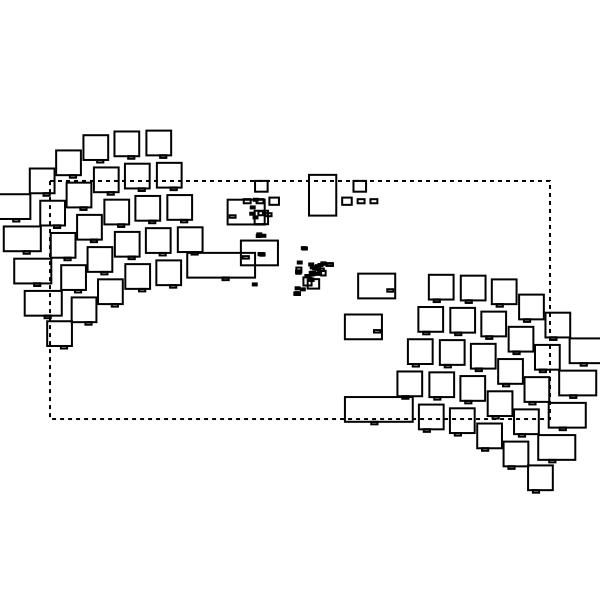

Running for 50 steps .. 72%|████████████████████▏       |  ETA: 0:00:01

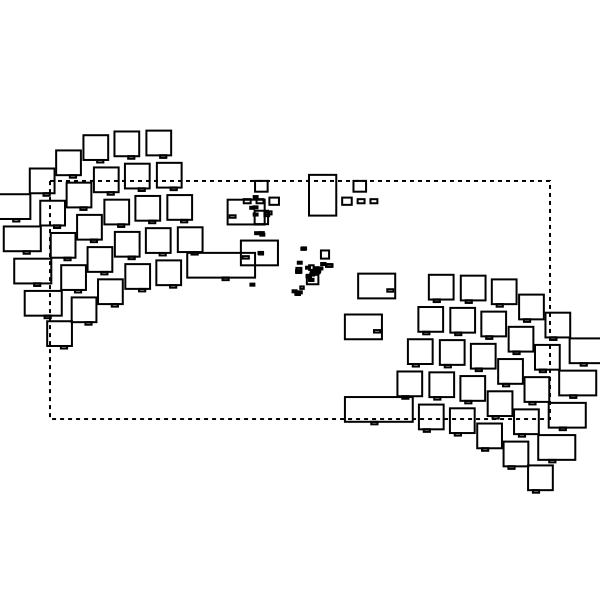

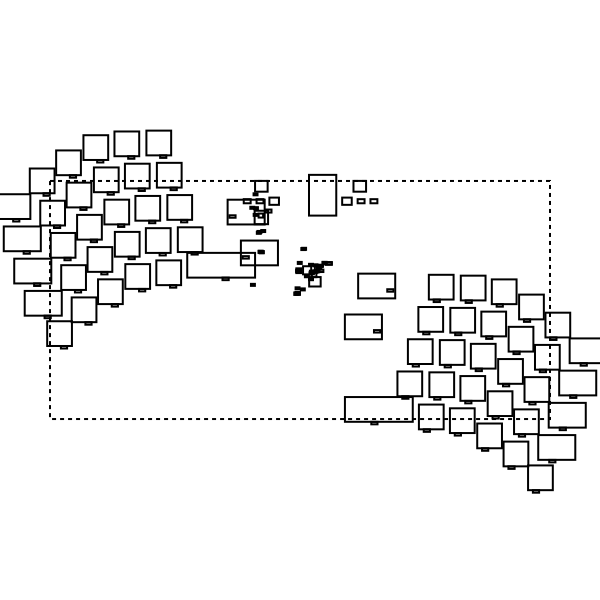

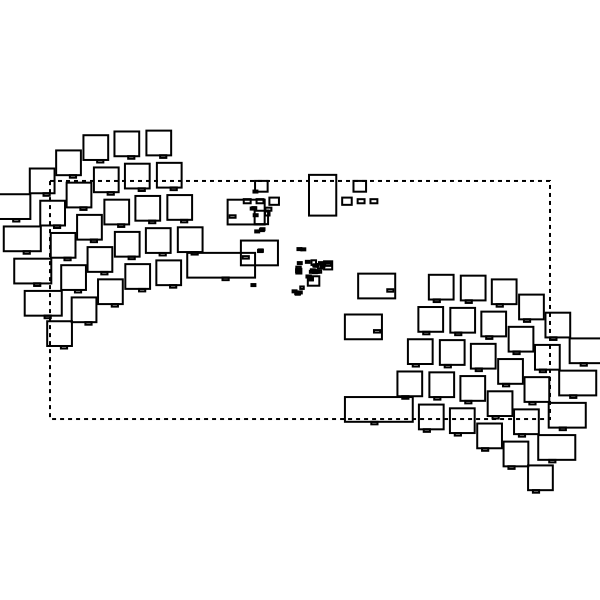

Running for 50 steps .. 78%|█████████████████████▉      |  ETA: 0:00:01

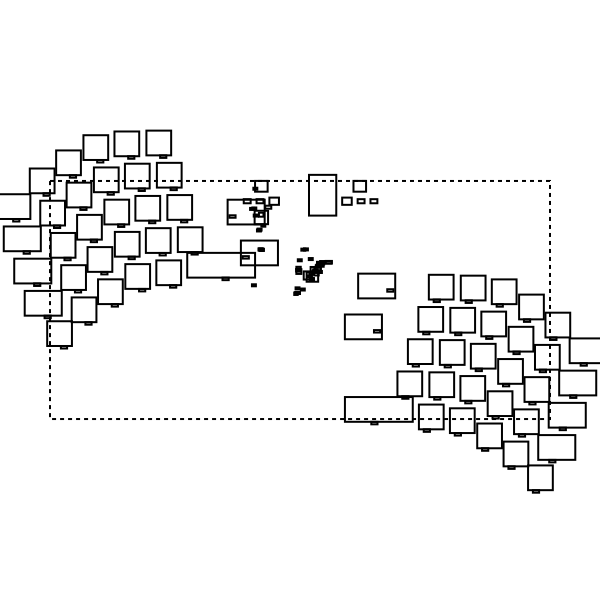

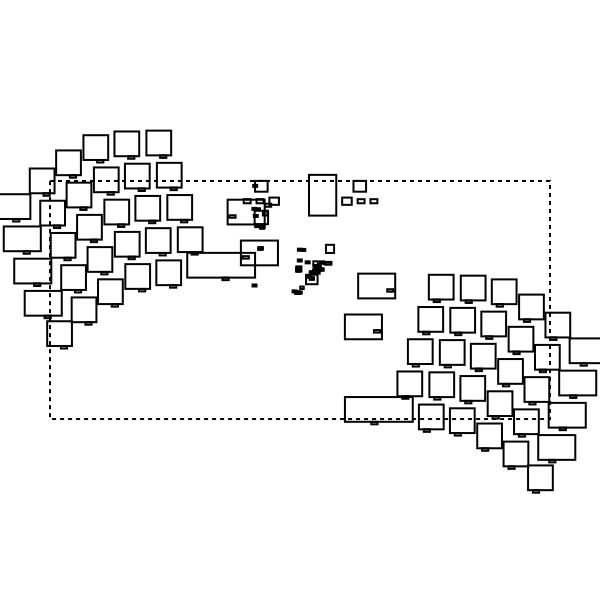

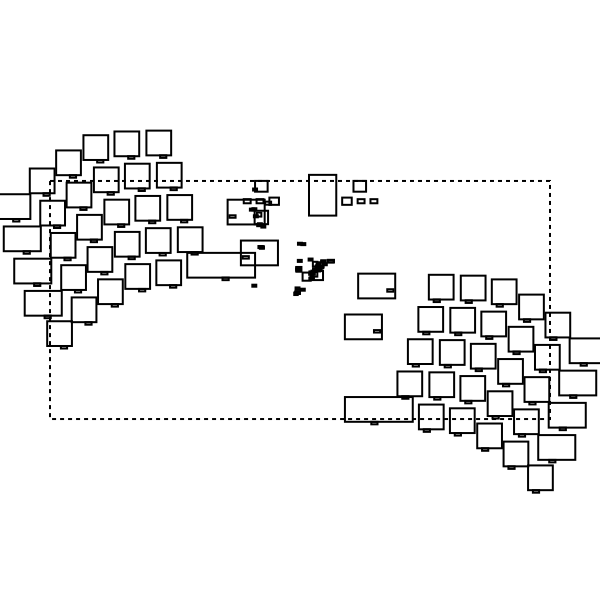

Running for 50 steps .. 84%|███████████████████████▌    |  ETA: 0:00:00

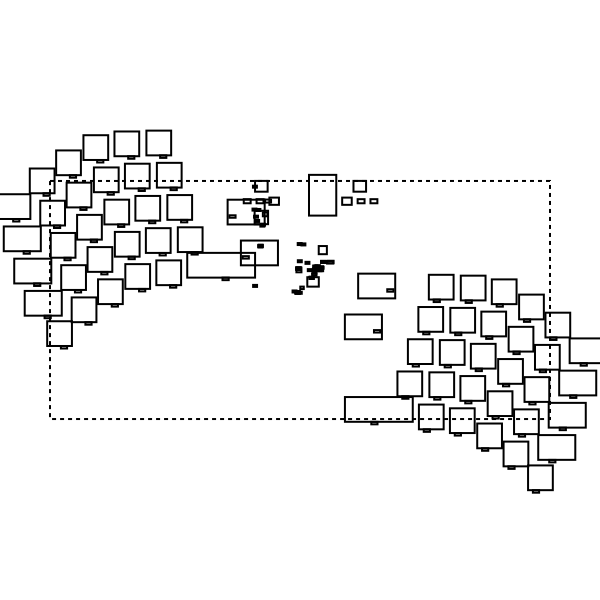

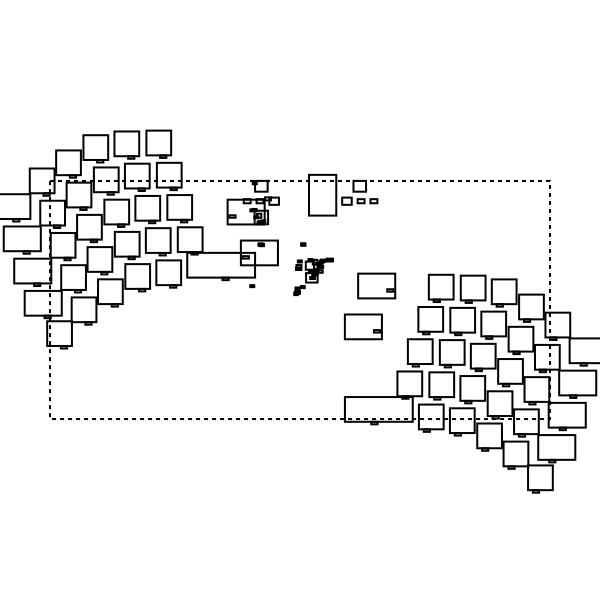

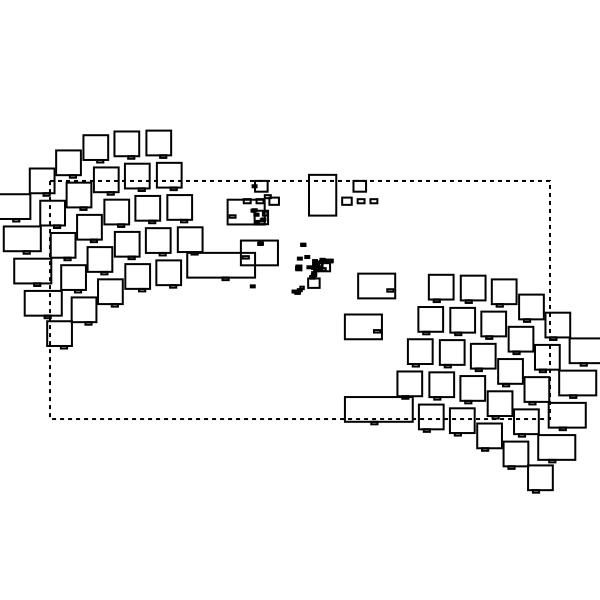

Running for 50 steps .. 90%|█████████████████████████▎  |  ETA: 0:00:00

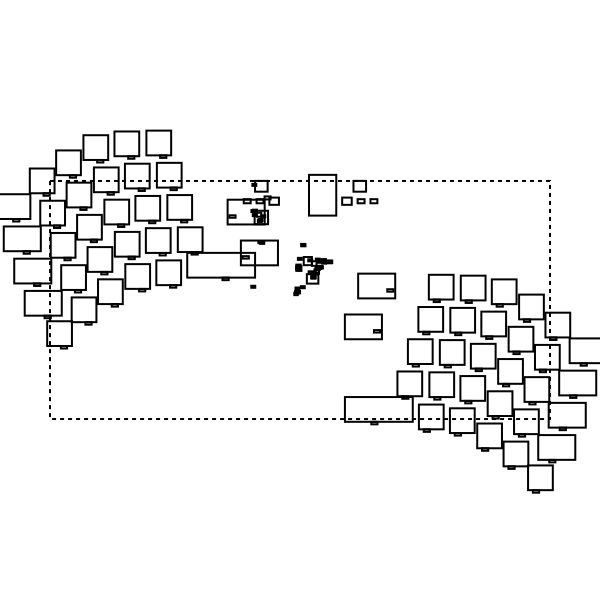

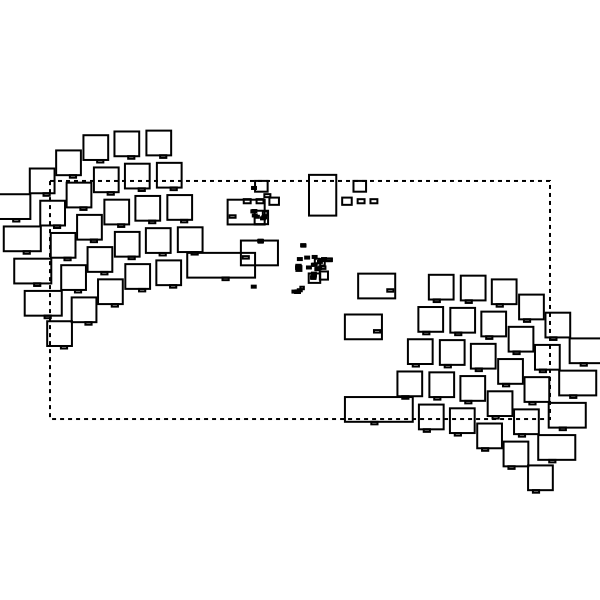

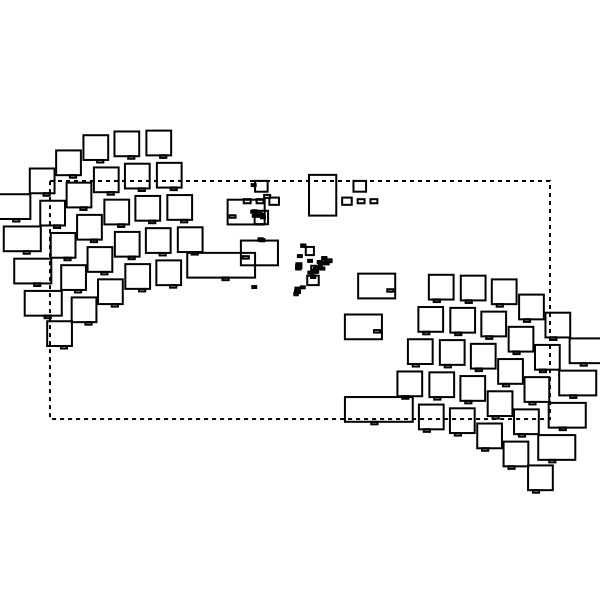

Running for 50 steps .. 96%|██████████████████████████▉ |  ETA: 0:00:00

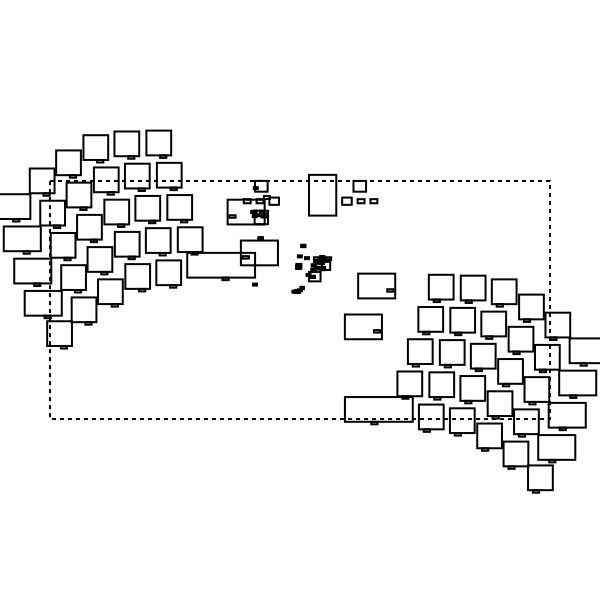

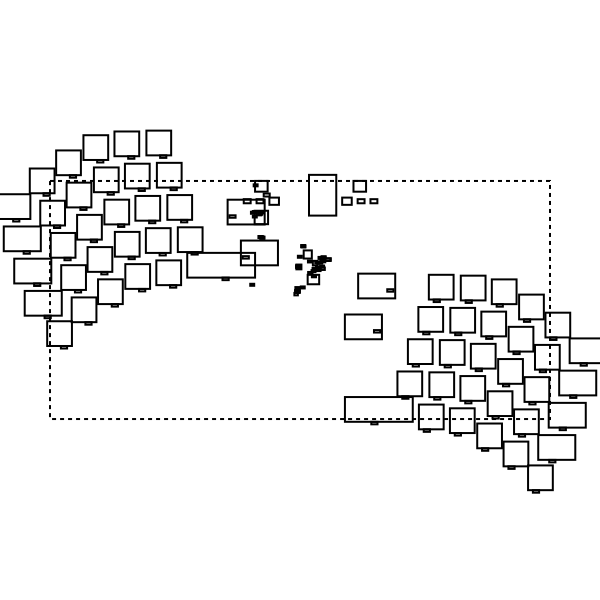

Running for 50 steps ..100%|████████████████████████████| Time: 0:00:02


(Float32[1699.4058, 1386.3552, 692.70435, 1248.8558, 742.9007, 900.496, 1075.0719, 823.17175, 46.404762, 269.3431  …  1401.0797, 700.41486, 681.5278, 874.6687, 130.78885, 1352.962, 1127.9402, 604.7044, 920.24725, 567.21106], Float32[821.72406, 732.939, 107.379425, 827.3695, 67.13326, 290.88962, 802.4475, 284.001, 551.21655, -77.6474  …  687.622, 120.96813, 14.4802, 315.287, 153.42525, 506.96326, 362.86707, 117.84618, 260.17667, 279.3219])

In [43]:
# global placement
solxs, solys = place(xs, ys, ws, hs, Es, mask, diearea,
                     nsteps=params["place-nsteps"],
                     nbins=params["place-nbins"], vis=true)

In [13]:
solxs2, solys2, solas = simulated_annealing_legalization(
    solxs, solys, as, ws, hs, mask, diearea,
    # vis=true,
    ncycles=params["sa-ncycles"],
    nsteps=params["sa-nsteps"],
    stepsize=params["sa-stepsize"],
    theta_stepsize=params["sa-theta-stepsize"])

┌ Info: cycle 2, remaining conflicts: 7
└ @ Main In[12]:68
Running for 10 cycles .. 10%|██▊                        |  ETA: 0:01:52┌ Info: cycle 3, remaining conflicts: 6
└ @ Main In[12]:68
Running for 10 cycles .. 20%|█████▍                     |  ETA: 0:01:26┌ Info: cycle 4, remaining conflicts: 6
└ @ Main In[12]:68
Running for 10 cycles .. 30%|████████▏                  |  ETA: 0:01:11┌ Info: cycle 5, remaining conflicts: 6
└ @ Main In[12]:68
Running for 10 cycles .. 40%|██████████▊                |  ETA: 0:00:59┌ Info: cycle 6, remaining conflicts: 6
└ @ Main In[12]:68
Running for 10 cycles .. 50%|█████████████▌             |  ETA: 0:00:49┌ Info: cycle 7, remaining conflicts: 6
└ @ Main In[12]:68
Running for 10 cycles .. 60%|████████████████▎          |  ETA: 0:00:39┌ Info: cycle 8, remaining conflicts: 6
└ @ Main In[12]:68
Running for 10 cycles .. 70%|██████████████████▉        |  ETA: 0:00:29┌ Info: cycle 9, remaining conflicts: 6
└ @ Main In[12]:68
Running for 10 cycles .. 80%|██

(Float32[1699.4058, 1386.3552, 576.05597, 1248.8558, 742.9007, 880.5856, 1075.0719, 826.5011, 46.404762, 269.3431  …  1401.0797, 700.41486, 626.57684, 865.71643, 130.78885, 1352.962, 1127.9402, 604.7044, 925.2441, 567.21106], Float32[821.72406, 732.939, 126.68459, 827.3695, 67.13326, 329.348, 802.4475, 276.80966, 551.21655, -77.6474  …  687.622, 120.96813, 35.209717, 318.98782, 153.42525, 506.96326, 362.86707, 117.84618, 261.82132, 279.3219], Float32[-0.31415927, -0.31415927, 0.0, -0.31415927, 0.0, 0.0, -0.31415927, 0.0, 0.31415927, 0.31415927  …  -0.31415927, 0.0, 0.0, 0.0, 0.31415927, -0.31415927, 1.2566371, -1.2566371, 0.0, 0.31415927], Any[25, 153, 154, 177, 185, 193])